In [ ]:
####################  Deep Learning Script for Bainite - Martensite Classification ########################
####################  Author: Juancheng Li   ########################
####################  Co-Author by Xiao Han Bie   ########################

**Motivation for the Underlying Problem : Can a CNN classify Scanning Electron Microscopic (SEM) images of 2 different classes of High-strength steel**




In aerospace applications, selecting the appropriate material for aircraft construction is crucial for mechanical engineers due to the high cost and challenges associated with maintenance and repairs in space. High-strength steels, such as Lower Bainite and Tempered Martensite, obtained through steel heat treatment, are extensively utilized in aerospace components like landing gear, engine parts, and fasteners, owing to their superior mechanical properties, strength, and toughness.

However, the susceptibility of these materials to hydrogen embrittlement in space is a concern. Under harsh environmental conditions, such as exposure to corrosive substances, high pressures, and temperature variations, hydrogen atoms can infiltrate the steel, diminishing ductility and increasing the risk of cracking. This can happen through hydrogen diffusion, hydrogen trapping in microstructures, and stress-assisted hydrogen migration [2] [3]. To address this issue, engineers prefer using lower bainite for aerospace components due to its higher resistance to hydrogen embrittlement compared to tempered martensite [1]. Lower bainite, forming at slightly higher temperatures during cooling, incorporates ferrite, contributing to enhanced toughness and better resistance to hydrogen embrittlement compared to fully martensitic structures [1].


In current steel industry, engineers employ scanning electron microscopy (SEM) to differentiate between lower bainite and tempered martensite. This process involves capturing SEM images of the steel's surface and comparing the resulting surface texture and microstructure patterns following the completion of heat treatment for high-strength steel. Despite the rigorous efforts of material science experts, distinguishing between these two types of high-strength steel solely based on their respective SEM images remains a great challenge for the human eye due to the striking similarities between them [4]. The SEM images illustrating lower bainite and tempered martensite are presented in the pictures below for reference.


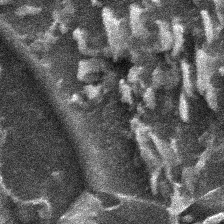

Figure 1 - SEM image for lower bainite microstructure


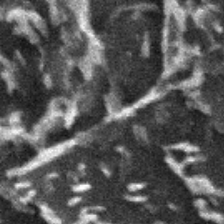

Figure 2 - SEM image for tempered martensite microstructure

The main mechanical engineering challenge involves accurately distinguishing between two high-strength steel classes: lower bainite and tempered martensite, essentially constituting a binary image classification problem. Convolutional Neural Networks (CNNs) are chosen for their proficiency in automatically learning spatial hierarchies of features like edges and textures crucial for image classification [5]. Specifically, the ResNet 152 architecture is selected, known for its exceptional performance and recognition as the winner of the ILSVRC 2015 competition [6].

Given our dataset's limited SEM images for lower bainite and tempered martensite (just over 2000 images per class), training a full-scale deep learning CNN from scratch is unfeasible. To address this, two techniques are applied. Firstly, data augmentation involving rotating and flipping images is employed to expand the dataset [7]. Secondly, transfer learning is utilized, leveraging a pre-trained deep learning neural network with proficiency in extracting meaningful features from the extensive ImageNet database [8].  Hyperparameter tuning and fine-tuning are also employed to ensure the correct training and to improve the performance of the deep CNN [8].

**Methodology**

In this project, TensorFlow serves as the underlying framework to execute the machine learning algorithm, while Keras functions as the high-level API, providing a user-friendly interface for building the machine learning architecture.


1.  ***train, validation, test split***

> The SEM image dataset for both high-strength steel classes is partitioned into 70% for training, 20% for validation, and 10% for testing. This distribution is designed to maximize the model's training efficacy given the limited image data. As more SEM images become available, they can be incorporated into the testing set to assess the model's real-world performance on unseen data.

> Specifically, for the lower bainite class, there are 920 images for training, 241 images for validation, and 129 images for testing. For the tempered martensite class, the dataset comprises 1114 images for training, 295 images for validation, and 157 images for testing. During the training phase, the deep learning model encounters both the training and validation sets, while the testing set, unseen during training, is exclusively used to evaluate the model's performance on novel data. The input image shape is rescaled into 224x224 as this is the standard input size for a ResNet CNN [6].




2.   ***data augmentation***

> Following the loading of the image dataset, data augmentation techniques, such as random rotation and random flipping, were applied to every batch of images during each epoch. This involves training the model on slightly varied images (rotated and flipped) in every epoch [7]. The implementation of data augmentation aims to minimize overfitting while enhancing the overall accuracy [9].

3.   ***model selection***


> As highlighted in the motivation section, the ResNet-152 architecture was chosen for its exceptional performance, notably winning the ILSVRC 2015 competition [6]. Comprising 152 convolutional layers, the architecture incorporates skip connections, allowing information to flow between layers and facilitating increased depth without information loss [6]. It's worth mentioning that ResNet152 comprises a total of 564 layers when all components are considered. Towards the network's end, a global average pooling layer is applied, followed by fully connected layers and softmax activation functions [6]. Notably, for this project, I did not train ResNet-152 from scratch; instead, I leveraged a pre-trained model from the Keras platform, adapting the final layers to suit our specific dataset.























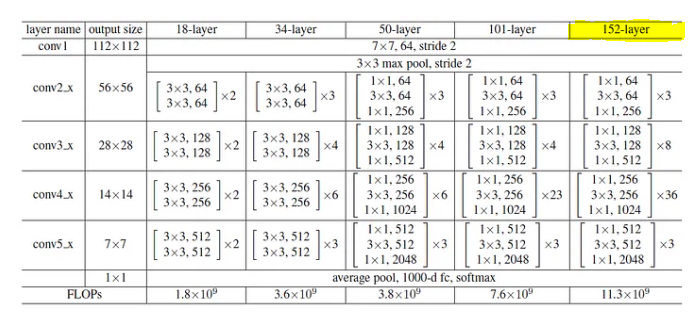

Figure 3 - ResNet CNN Architecture

4.   ***transfer learning***



> Transfer learning is another key technique used in this project by exploiting the utilization of a pre-trained deep learning CNN that already learned to extract features and underlying patterns in images. In our case, ImageNet, an extensive online image database containing 1.2 million images from 1000 different classes, was used to pre-train the deep learning model consisting of ResNet152 [8].

> To initialize the deep CNN, weights were initially set based on knowledge gained from training on the ImageNet dataset. Following this, all base layers, primarily comprising convolutional and max-pooling layers, were frozen. This freezing prevents any modification in the weights of individual neurons when adapting the pre-trained network to the specific high-strength steel dataset in this project [11]. The last fully connected layer from the original pre-trained ResNet152 CNN was replaced by a global average pooling layer, and its output was directly fed into the Sigmoid activation layer [10]. This is justified by the global average pooling layer's robustness in preventing overfitting and preserving spatial information, which proves highly advantageous in tackling image classification problems [10]. The choice of Sigmoid activation is made due to the binary nature of the classification problem, involving only two classes.


> The customized ResNet152, employing transfer learning, was subsequently trained with the 2 classes of high-strength steel SEM images. Notably, only the weights of the newly introduced global average pooling layer underwent modification during the training process [11]. The architecture of ResNet152 is shown below.

5.    ***regularization***


> To tackle overfitting in the CNN model, dropout, a regularization technique, is used. Overfitting occurs when the model becomes too specialized in the training data but struggles with new, unseen data. Dropout helps by turning off random neurons during training iterations, making the network less dependent on specific neurons and more resilient [8]. After experimentation, a dropout rate of 0.2 was identified as yielding promising performance for the ResNet152 CNN on the high-strength steel dataset.


6.   ***hyper-parameters***



> The key hyperparameter tuning focused on the learning rate, critical for controlling the convergence of the model, with an optimal value of 0.001 identified during initial training. The hyperparameter of Batch size was set to 32 for standard CNN practices [8]. Another hyperparameter was the optimzer Adam. Adam was chosen because it is the recommended default optimizer. On Keras documentation, it was noted than Adam has faster compute time and requires less tuning [11]. The last hyperparameter, the number of epochs, representing when the model completes a full iteration through the training data, was set at 40 as model has convergence on accuracy and loss [11]. The crucial parameters affecting model performance were identified as learning rate and epochs, with variations significantly impacting accuracy. For instance, a learning rate of 0.01 performed considerably worse than 0.001, and an epoch of 20 exhibited inferior results compared to 40, while the other parameters had minimal impact on the model.

7.   ***fine tuning***



> Fine tuning is a standard technique used in deep learning and transfer learning as a way to improve the performance of a pre-trained network on a new smaller dataset [8]. This process focuses on adjusting the last few laters of the network (fine tune) to adapt to the specifics of the new dataset, in our case, the high-strength steel dataset. This is efficient and less computationally expensive than changing the learning rate from the beginning and retraining the entire network several times [11]. To fine tune, the fine tuning layer started at 520 as ResNet152 had a total of 564 layers, which is approximately the last 10%. The learning rate was made smaller by 0.001 times (0.000001) since I want the network to learn the last few layers really well to fit to the dataset. The epochs was set to be 20 and the accuracy improved by 3% and reached up to 93%.

7.   ***Metrics and Evaluation***



> The model's performance is assessed using accuracy, precision, recall, AUC, and binary cross entropy loss. Accuracy gauges overall correctness, while precision and recall offer alternative perspectives on the accuracy of positive predictions and the completeness of positive predictions, providing deeper insights into the model's real performance [11]. The AUC-ROC curve evaluates the model's ability to distinguish between positive and negative classes, and binary cross entropy loss indicates how well the model fits the data. Ideal performance targets include accuracy close to 100, precision, recall, and AUC near 1, and a loss function close to 0.





In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

In [ ]:
print(tf.__version__)
print(np.__version__)

2.14.0
1.23.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# folder path
base_dir = '/content/drive/My Drive/SURE Summer 2022/'
train_dir = os.path.join(base_dir, 'train3')
validation_dir = os.path.join(base_dir, 'validation3')
test_dir = os.path.join(base_dir, 'test3')

Mounted at /content/drive


In [ ]:
# setting parameters
initial_epochs= 40
batch_size = 32

In [ ]:
# load image dataset
training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
validation_set = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(224, 224))
# load image dataset
test_set = image_dataset_from_directory(test_dir,
                                             shuffle=False,
                                             batch_size=32,
                                             image_size=(224, 224))


Found 2034 files belonging to 2 classes.
Found 536 files belonging to 2 classes.
Found 286 files belonging to 2 classes.


In [ ]:
# data augmentation (add preprocessing layers to model)
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
  layers.RandomFlip("horizontal_and_vertical"),
])


In [ ]:
# define based model = ResNet152V2
# define input shape as 224 x 224 x 3
# dataset trained on is imagenet
base_model = keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)  # discard FC layer from resnet_v2 model


# freeze base model layers
base_model.trainable = False

# define input sizes to deep learning model
inputs = keras.Input(shape=(224, 224, 3))

# augment data
x = data_augmentation(inputs)

# preprocess input values scale to (-1,1) to fit resnet_v2 model
x = tf.keras.applications.resnet_v2.preprocess_input(x)


234545216/234545216 [==============================] - 7s 0us/step


In [ ]:
# build FC layer with our image dataset x
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs, outputs)

In [ ]:
# compile model and train
initial_epochs=40
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=[keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
history = model.fit(training_set, epochs=initial_epochs, validation_data=validation_set)

Epoch 1/40
64/64 [==============================] - 171s 2s/step - loss: 0.6215 - binary_accuracy: 0.6500 - precision: 0.6648 - recall: 0.7280 - auc: 0.7071 - val_loss: 0.4856 - val_binary_accuracy: 0.7743 - val_precision: 0.7500 - val_recall: 0.8847 - val_auc: 0.8734
Epoch 2/40
64/64 [==============================] - 7s 113ms/step - loss: 0.4629 - binary_accuracy: 0.7881 - precision: 0.7887 - recall: 0.8375 - auc: 0.8702 - val_loss: 0.4166 - val_binary_accuracy: 0.8340 - val_precision: 0.8102 - val_recall: 0.9119 - val_auc: 0.9145
Epoch 3/40
64/64 [==============================] - 7s 115ms/step - loss: 0.3981 - binary_accuracy: 0.8309 - precision: 0.8268 - recall: 0.8743 - auc: 0.9121 - val_loss: 0.3769 - val_binary_accuracy: 0.8526 - val_precision: 0.8439 - val_recall: 0.8983 - val_auc: 0.9301
Epoch 4/40
64/64 [==============================] - 7s 113ms/step - loss: 0.3783 - binary_accuracy: 0.8476 - precision: 0.8436 - recall: 0.8860 - auc: 0.9202 - val_loss: 0.3477 - val_binary_a

In [ ]:
model.save(os.path.join(base_dir, 'model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_auc'])


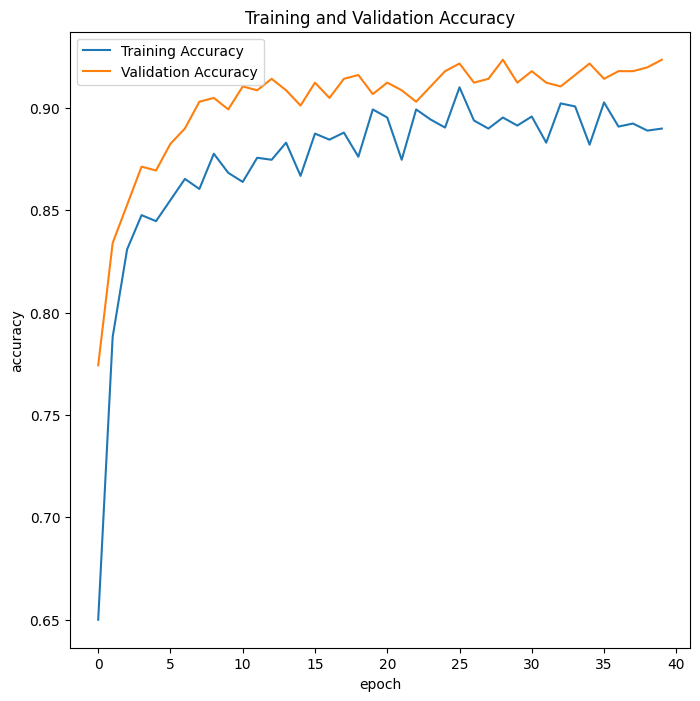

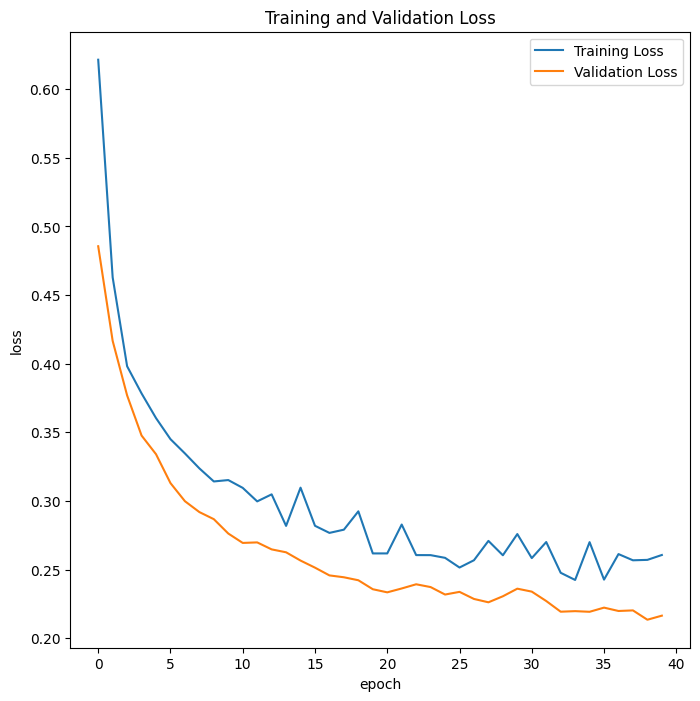

In [ ]:
##################################################
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))


plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
##################################################

In [ ]:
# load model
reconstructed_model = tf.keras.models.load_model(os.path.join(base_dir, 'model.h5'))

In [ ]:
test = reconstructed_model.evaluate(test_set)
print('test set loss:' + str(test[0]))
print('test set accuracy:' + str(test[1]))

9/9 [==============================] - 1s 86ms/step - loss: 0.2258 - binary_accuracy: 0.9196 - precision: 0.9187 - recall: 0.9363 - auc: 0.9722
test set loss:0.22584986686706543
test set accuracy:0.9195803999900818


In [ ]:
base_model = model.layers[4]
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 520

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

loss_function=tf.keras.losses.BinaryCrossentropy()

base_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001*base_learning_rate)

metrics=[keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)


fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(training_set,
                         batch_size=32,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_set)

Number of layers in the base model:  564
Epoch 40/60
64/64 [==============================] - 26s 167ms/step - loss: 0.2354 - binary_accuracy: 0.9056 - precision_1: 0.9080 - recall_1: 0.9210 - auc_1: 0.9668 - val_loss: 0.2015 - val_binary_accuracy: 0.9272 - val_precision_1: 0.9267 - val_recall_1: 0.9424 - val_auc_1: 0.9791
Epoch 41/60
64/64 [==============================] - 8s 125ms/step - loss: 0.2461 - binary_accuracy: 0.9002 - precision_1: 0.9027 - recall_1: 0.9165 - auc_1: 0.9625 - val_loss: 0.1927 - val_binary_accuracy: 0.9310 - val_precision_1: 0.9243 - val_recall_1: 0.9525 - val_auc_1: 0.9801
Epoch 42/60
64/64 [==============================] - 8s 125ms/step - loss: 0.2329 - binary_accuracy: 0.9017 - precision_1: 0.9080 - recall_1: 0.9129 - auc_1: 0.9666 - val_loss: 0.1855 - val_binary_accuracy: 0.9272 - val_precision_1: 0.9507 - val_recall_1: 0.9153 - val_auc_1: 0.9815
Epoch 43/60
64/64 [==============================] - 8s 125ms/step - loss: 0.2133 - binary_accuracy: 0.9218 -

In [ ]:
model.save(os.path.join(base_dir, 'fine_tuned_model.h5'))

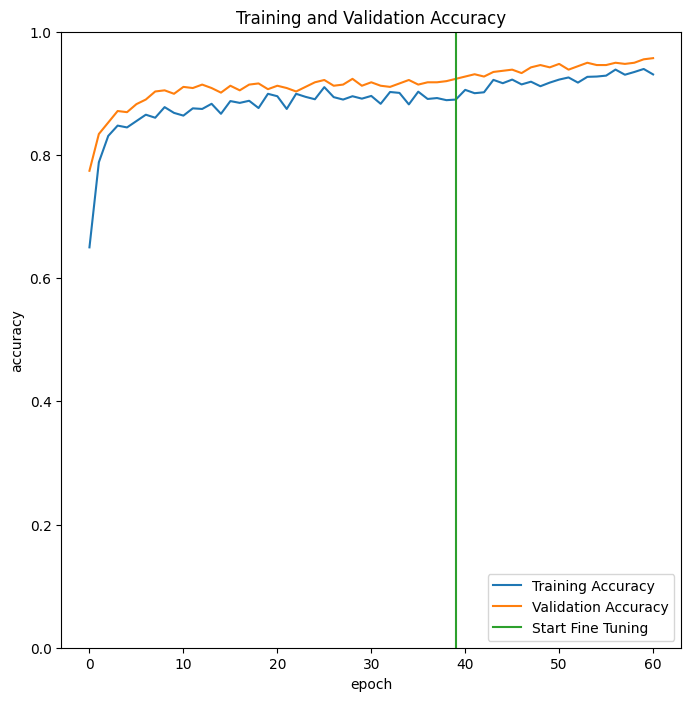

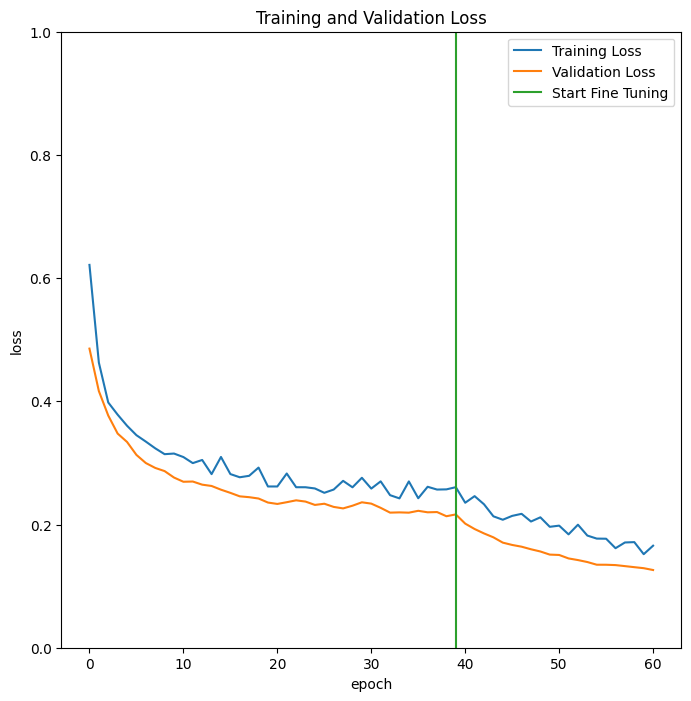

In [ ]:
##########################################################################


acc += history_fine.history['binary_accuracy']
val_acc += history_fine.history['val_binary_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']




plt.figure(figsize=(8, 8))

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



#######################################################################

In [ ]:
# load model
reconstructed_fineTuned_model = tf.keras.models.load_model(os.path.join(base_dir, 'fine_tuned_model.h5'))

In [ ]:
test2 = reconstructed_fineTuned_model.evaluate(test_set)
print('test set loss:' + str(test2[0]))
print('test set accuracy:' + str(test2[1]))

9/9 [==============================] - 3s 88ms/step - loss: 0.1425 - binary_accuracy: 0.9476 - precision_1: 0.9610 - recall_1: 0.9427 - auc_1: 0.9877
test set loss:0.14253897964954376
test set accuracy:0.9475524425506592


**Conclusion and Discussion**

In summary, the ResNet152 model achieved an impressive accuracy of approximately 89%, with precision and recall both reaching 0.89 during training. Notably, the model exhibited a higher accuracy of 92% on the testing dataset, showcasing its ability to generalize effectively to unseen data in real-world scenarios. Fine-tuning further improved the model's accuracy to 94%, with precision and recall nearing 0.95. Remarkably, the fine-tuned model maintained a comparable accuracy of 94% on the test set compared to the training phase.


Analysis of both the accuracy curves and the loss curves provided insights into the model's performance and convergence. For accuracy curves, the increasing trend in both training and validation converged to a high accuracy after around 35 epochs for pre-fine-tuned case. For the post-fine-tuned case, the training and validation accuracy curves converged after an additional 20 epochs. For loss curves, the decreasing trend in both training and validation loss, converging to values of 0.27 and 0.16 respectively in pre-fine-tuned and post-fine-tuned cases, indicated successful learning and pattern recognition. Importantly, there was no evidence of overfitting, as both training and validation losses decreased at similar rates, and test performance was nearly as robust as training performance, if not better.

However, it's crucial to acknowledge limitations. Data augmentation, while enhancing the dataset, risks potential information loss due to certain transformations. For instance, rotating or flipping images may distort some features critical for the model's learning. Additionally, the increased number of images resulting from augmentation significantly extended the training time.

Regarding transfer learning, choosing which layers to freeze or fine-tune can be complex. Finding the right balance is essential to prevent underfitting or overfitting. Moreover, the inherent black-box nature of CNN solutions limits interpretability, making it challenging to understand the underlying mechanisms driving model decisions. Faith in the model's effectiveness relies solely on performance metrics, given the lack of interpretability.

In conclusion, the project achieved success by developing a CNN model with a remarkable 94% accuracy in classifying two types of high-strength steel—lower bainite and tempered martensite. The effective application of data augmentation expanded the dataset, enhancing the model's training, while transfer learning capitalized on pre-trained network capabilities for improved feature extraction from SEM steel images. These subtle yet impactful strategies contributed to the overall success of the project.

**Citations**

[1] Jo, Jang Woong and Kim, Jae Nam and Lee, Chong Soo, Increasing the Resistance to Hydrogen Embrittlement in Martensitic Steel by Partial Phase Transformation and Tempering. Available at SSRN: https://ssrn.com/abstract=4146149 or http://dx.doi.org/10.2139/ssrn.4146149

[2] Das, T., Chakrabarty, R., Song, J., & Yue, S. (2022). Understanding microstructural influences on hydrogen diffusion characteristics in martensitic steels using finite element analysis (FEA). International Journal of Hydrogen Energy, 47(2), 1343-1357. https://doi.org/10.1016/j.ijhydene.2021.10.048

[3] Li, X., Yin, J., Zhang, J., Wang, Y., Song, X., Zhang, Y., & Ren, X. (2022). Hydrogen embrittlement and failure mechanisms of multi-principal element alloys: A review. Journal of Materials Science & Technology, 122, 20-32. https://doi.org/10.1016/j.jmst.2022.01.008

[4] Kawata, H., Hayashi, K., Wakabayashi, C. et al. Martensite Transformation Start Temperature During Quench and Austempering in Fe-8Ni-0.2C Alloys. Metall Mater Trans A 52, 1395–1408 (2021). https://doi.org/10.1007/s11661-021-06167-y

[5] Image classification using CNN: Introduction and tutorial. Datagen. (2023, May 22). https://datagen.tech/guides/image-classification/image-classification-using-cnn/

[6] Tsang, S.-H. (2019, March 20). Review: Resnet - winner of ILSVRC 2015 (Image Classification, localization, detection). Medium. https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8

[7] Data augmentation&nbsp; :&nbsp;  Tensorflow Core. TensorFlow. (n.d.). https://www.tensorflow.org/tutorials/images/data_augmentation

[8] Transfer learning and fine-tuning&nbsp; :&nbsp;  Tensorflow Core. TensorFlow. (n.d.-b). https://www.tensorflow.org/tutorials/images/transfer_learning

[9] Robinet, L. (2020, December 4). Data augmentation and handling huge datasets with keras: A simple way. Medium. https://towardsdatascience.com/data-augmentation-and-handling-huge-datasets-with-keras-a-simple-way

[10] Papers with code - global average pooling explained. Explained | Papers With Code. (n.d.). https://paperswithcode.com/method/global-average-pooling

[11] Team, K. (n.d.). Keras Documentation: Transfer Learning &amp; Fine-tuning. https://keras.io/guides/transfer_learning/
